In [1]:

# Complete CNN Tutorial - Image Classification
# From Basics to Advanced Architectures

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Style settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)

In [4]:
print("=" * 100)
print("🖼️  CONVOLUTIONAL NEURAL NETWORKS (CNN) - COMPLETE TUTORIAL")
print("=" * 100)
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
print("=" * 100)

🖼️  CONVOLUTIONAL NEURAL NETWORKS (CNN) - COMPLETE TUTORIAL
TensorFlow Version: 2.19.0
GPU Available: True


In [5]:
# ============================================================================
# PART 1: SIMPLE CNN - MNIST DIGIT CLASSIFICATION
# ============================================================================

print("\n" + "=" * 100)
print("📚 PART 1: SIMPLE CNN - MNIST HANDWRITTEN DIGITS (10 Classes)")
print("=" * 100)


📚 PART 1: SIMPLE CNN - MNIST HANDWRITTEN DIGITS (10 Classes)


In [6]:
# Load MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print(f"\nTraining Data Shape: {X_train_mnist.shape}")
print(f"Test Data Shape: {X_test_mnist.shape}")
print(f"Number of Classes: {len(np.unique(y_train_mnist))}")
print(f"Image Size: {X_train_mnist.shape[1]}x{X_train_mnist.shape[2]}")


Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)
Number of Classes: 10
Image Size: 28x28


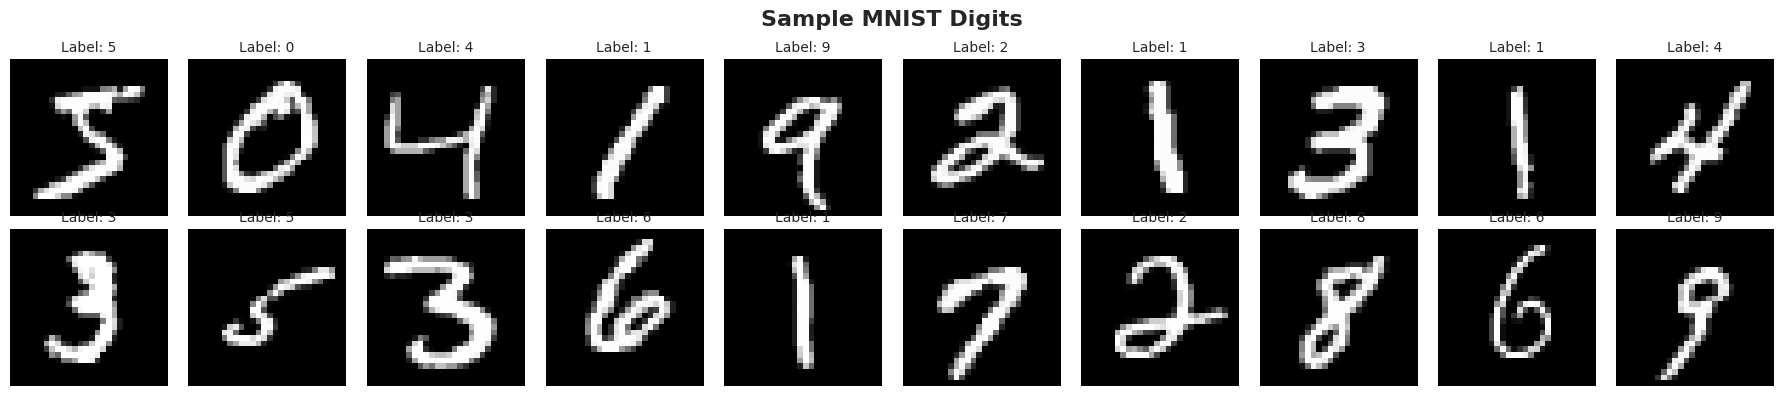

In [8]:
# Visualize sample images
fig, axes = plt.subplots(2, 10, figsize=(18, 4))
fig.suptitle('Sample MNIST Digits', fontsize=16, fontweight='bold')
for i in range(20):
    ax = axes[i // 10, i % 10]
    ax.imshow(X_train_mnist[i], cmap='gray')
    ax.set_title(f'Label: {y_train_mnist[i]}', fontsize=10)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Preprocess MNIST data
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [11]:
X_test_mnist

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
# Convert labels to categorical
y_train_mnist_cat = keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist_cat = keras.utils.to_categorical(y_test_mnist, 10)


In [15]:
# Build Simple CNN
print("\n🏗️  Building Simple CNN Architecture:")
print("-" * 100)


🏗️  Building Simple CNN Architecture:
----------------------------------------------------------------------------------------------------


In [16]:
model_simple_cnn = models.Sequential([
    # First Convolutional Block
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1'),
    layers.MaxPooling2D((2, 2), name='pool1'),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
    layers.MaxPooling2D((2, 2), name='pool2'),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3'),

    # Flatten and Dense Layers
    layers.Flatten(name='flatten'),
    layers.Dense(64, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(10, activation='softmax', name='output')
], name='Simple_CNN')


In [17]:
model_simple_cnn.summary()


Model: "Simple_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile
model_simple_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [20]:
# Train
print("\n🎯 Training Simple CNN...")
history_simple = model_simple_cnn.fit(
    X_train_mnist, y_train_mnist_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


🎯 Training Simple CNN...
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7635 - loss: 0.7197 - val_accuracy: 0.9818 - val_loss: 0.0573 - learning_rate: 0.0010
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9615 - loss: 0.1309 - val_accuracy: 0.9887 - val_loss: 0.0454 - learning_rate: 0.0010
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9746 - loss: 0.0913 - val_accuracy: 0.9902 - val_loss: 0.0392 - learning_rate: 0.0010
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0697 - val_accuracy: 0.9920 - val_loss: 0.0294 - learning_rate: 0.0010
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9834 - loss: 0.0570 - val_accuracy: 0.9923 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9872 - loss: 0.0457 - val_accuracy: 0.9917 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accura

In [21]:
# Evaluate
test_loss, test_acc = model_simple_cnn.evaluate(X_test_mnist, y_test_mnist_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")



✅ Test Accuracy: 0.9900
✅ Test Loss: 0.0310


In [22]:
# Predictions
y_pred_mnist = np.argmax(model_simple_cnn.predict(X_test_mnist, verbose=0), axis=1)


In [28]:
X_test_mnist

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [29]:
y_pred_mnist

array([7, 2, 1, ..., 4, 5, 6])

Text(0.5, 0.98, 'Simple CNN - MNIST Performance Analysis')

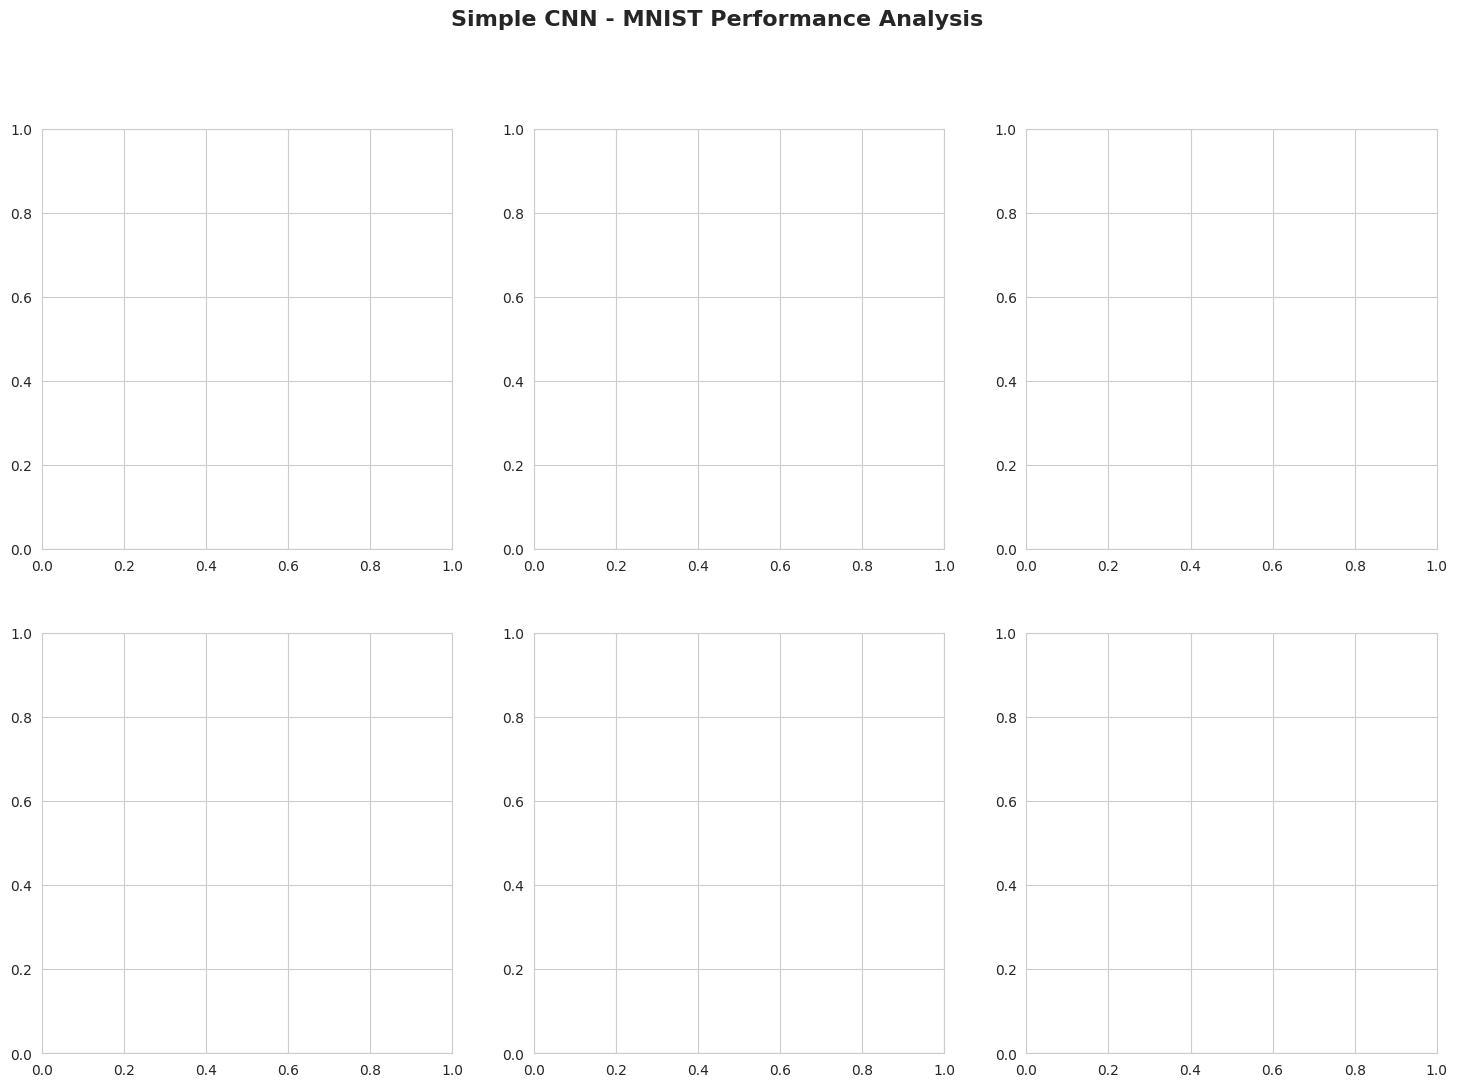

In [26]:

# Visualize Results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Simple CNN - MNIST Performance Analysis', fontsize=16, fontweight='bold')


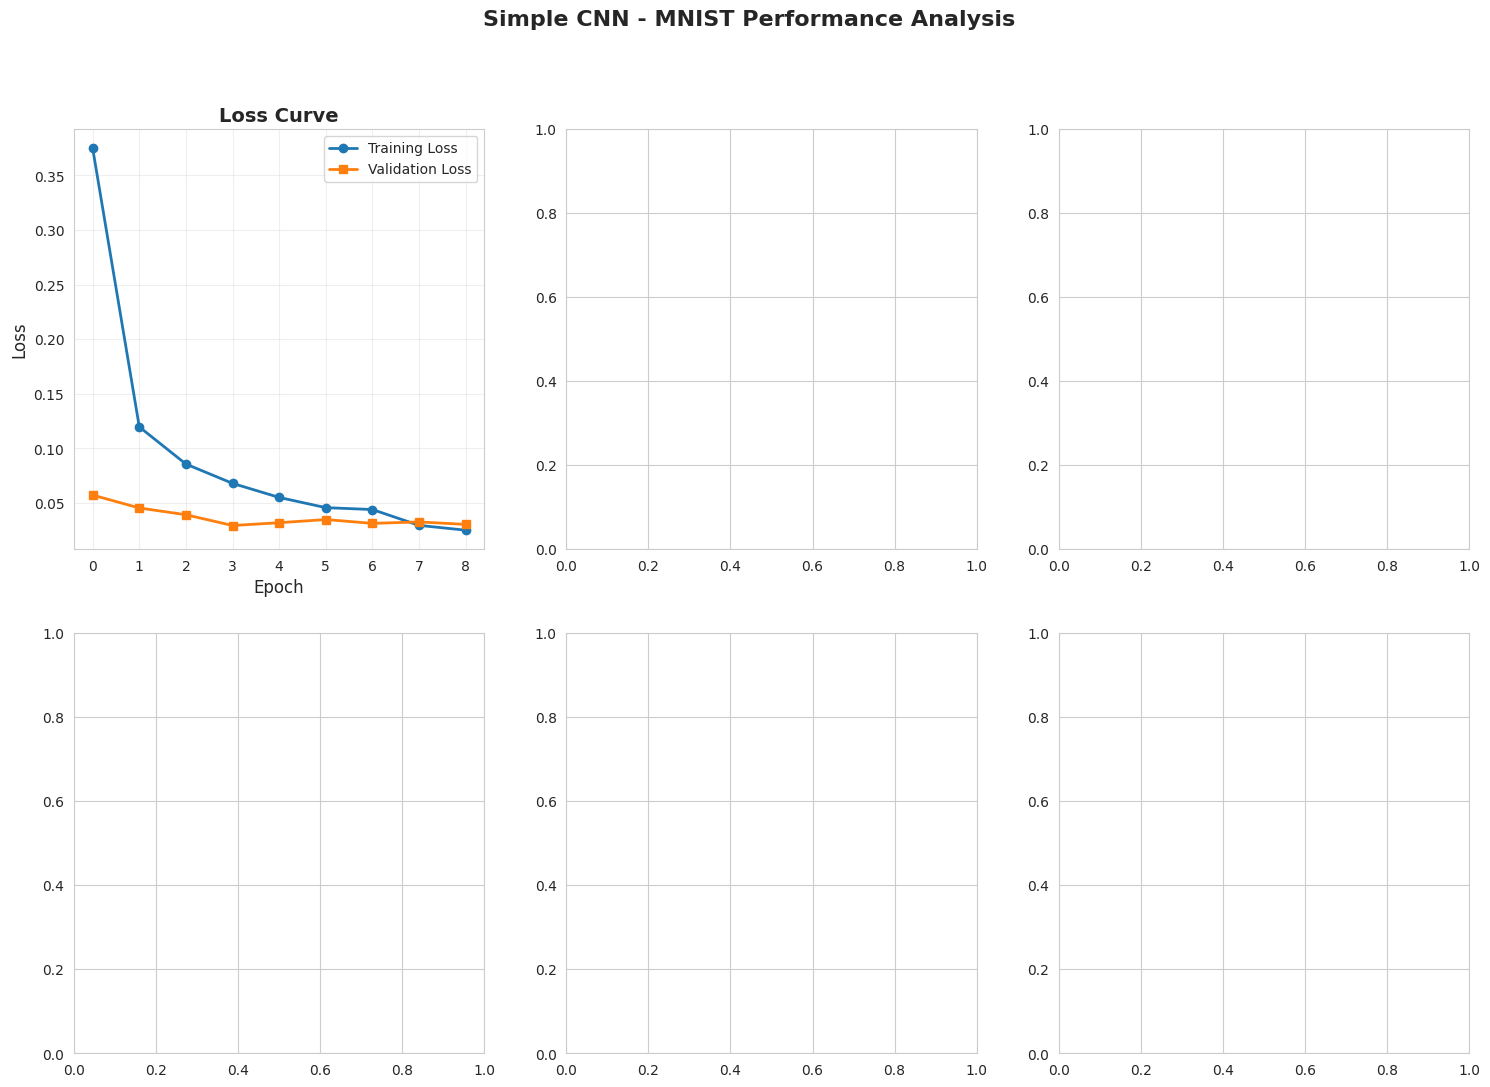

In [27]:

# Visualize Results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Simple CNN - MNIST Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Training History - Loss
ax = axes[0, 0]
ax.plot(history_simple.history['loss'], label='Training Loss', linewidth=2, marker='o')
ax.plot(history_simple.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)


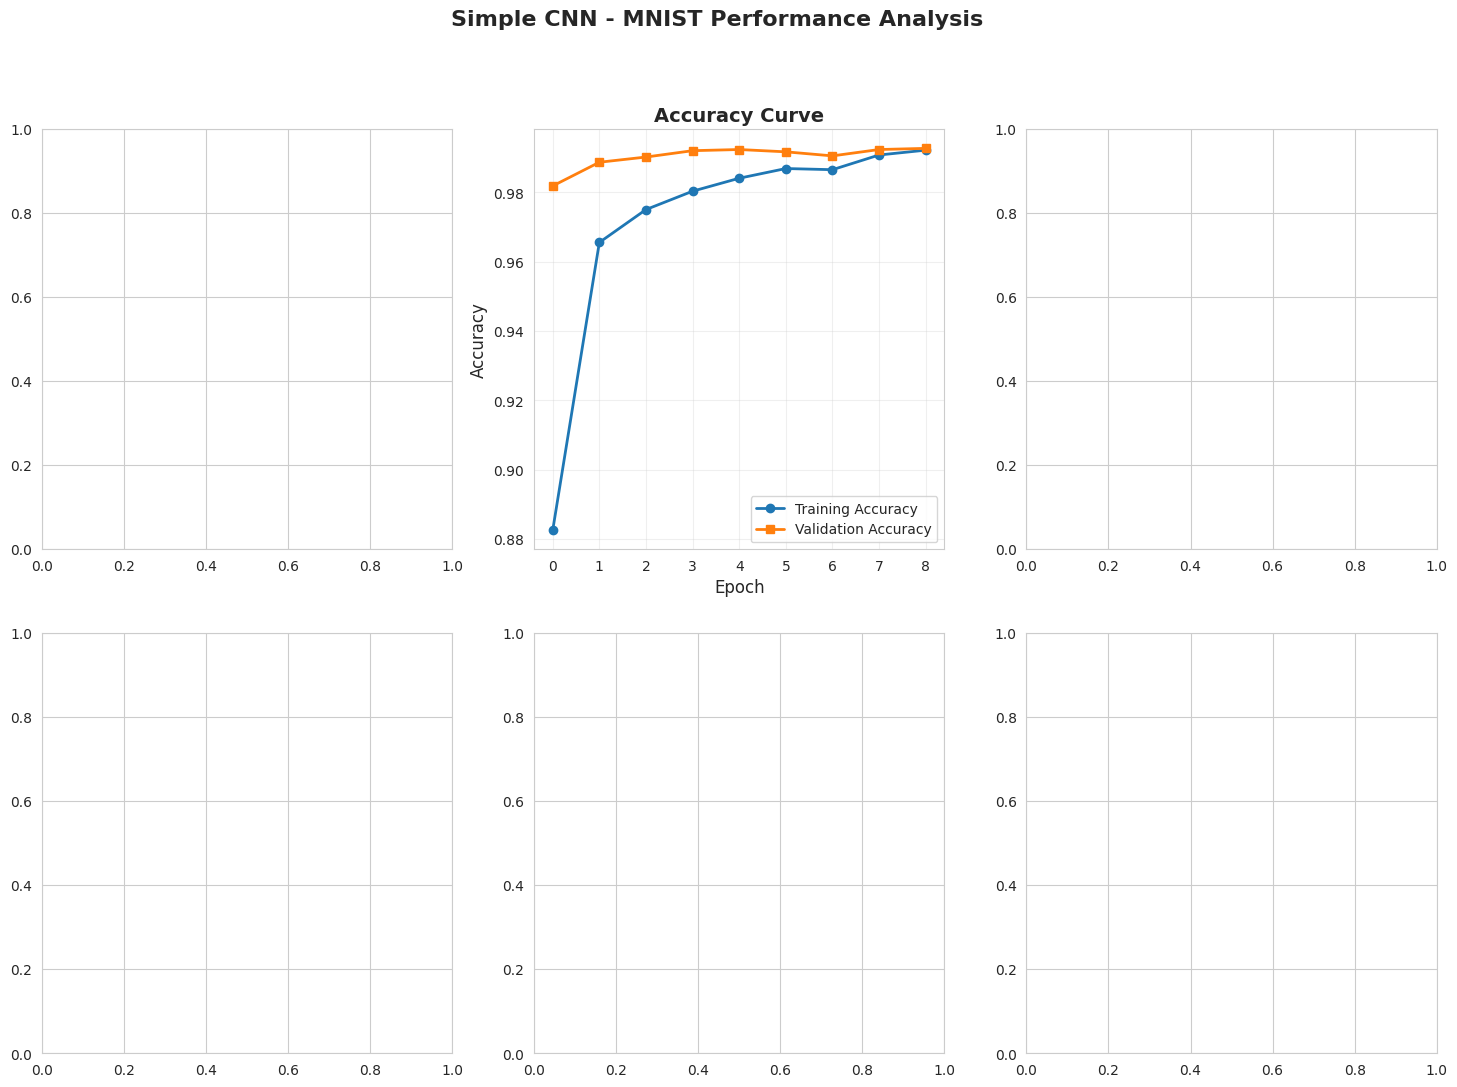

In [33]:
# Plot 2: Training History - Accuracy
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Simple CNN - MNIST Performance Analysis', fontsize=16, fontweight='bold')
ax = axes[0, 1]
ax.plot(history_simple.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
ax.plot(history_simple.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

In [31]:
# Plot 3: Confusion Matrix
ax = axes[0, 2]
cm = confusion_matrix(y_test_mnist, y_pred_mnist)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar_kws={'label': 'Count'})
ax.set_title('Confusion Matrix', fontweight='bold', fontsize=14)
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)


Text(0.5, 606.7222222222223, 'Predicted Label')

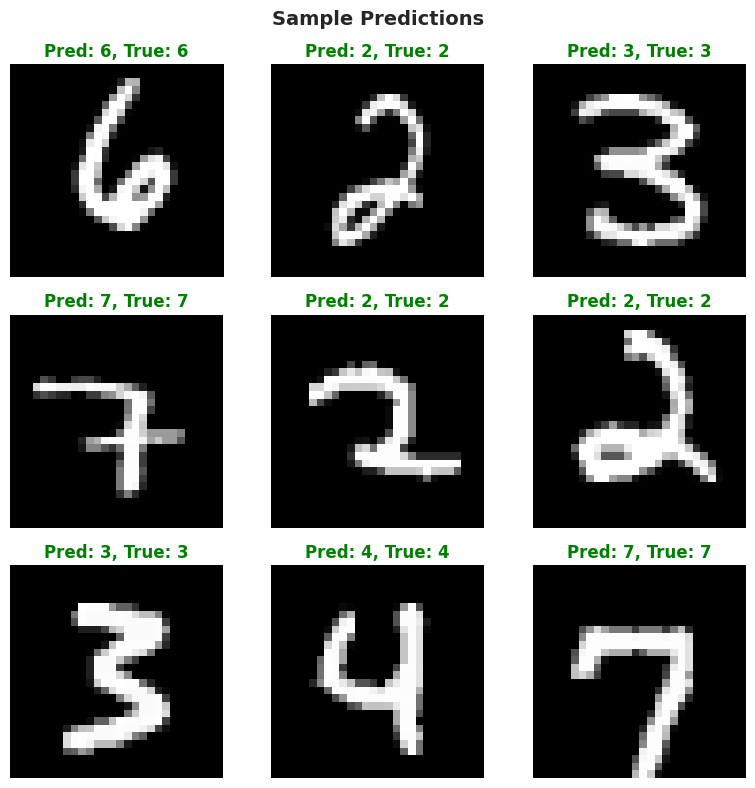

In [34]:
# Plot 4: Sample Predictions
ax = axes[1, 0]
ax.axis('off')
sample_indices = np.random.choice(len(X_test_mnist), 9, replace=False)
fig2, axes2 = plt.subplots(3, 3, figsize=(8, 8))
fig2.suptitle('Sample Predictions', fontsize=14, fontweight='bold')
for idx, sample_idx in enumerate(sample_indices):
    i, j = idx // 3, idx % 3
    axes2[i, j].imshow(X_test_mnist[sample_idx].reshape(28, 28), cmap='gray')
    pred = y_pred_mnist[sample_idx]
    true = y_test_mnist[sample_idx]
    color = 'green' if pred == true else 'red'
    axes2[i, j].set_title(f'Pred: {pred}, True: {true}', color=color, fontweight='bold')
    axes2[i, j].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Plot 5: Class-wise Accuracy
ax = axes[1, 1]
class_acc = []
for i in range(10):
    mask = y_test_mnist == i
    if mask.sum() > 0:
        acc = (y_pred_mnist[mask] == y_test_mnist[mask]).mean()
        class_acc.append(acc)
    else:
        class_acc.append(0)

In [ ]:

colors = ['green' if acc > 0.95 else 'orange' if acc > 0.90 else 'red' for acc in class_acc]
bars = ax.bar(range(10), class_acc, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Digit Class', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Per-Class Accuracy', fontweight='bold', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xticks(range(10))
ax.grid(True, alpha=0.3, axis='y')

In [ ]:
# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)


In [ ]:
# Plot 6: Misclassified Examples
ax = axes[1, 2]
ax.axis('off')
misclassified = np.where(y_pred_mnist != y_test_mnist)[0][:9]
fig3, axes3 = plt.subplots(3, 3, figsize=(8, 8))
fig3.suptitle('Misclassified Examples', fontsize=14, fontweight='bold')
for idx, sample_idx in enumerate(misclassified):
    i, j = idx // 3, idx % 3
    axes3[i, j].imshow(X_test_mnist[sample_idx].reshape(28, 28), cmap='gray')
    pred = y_pred_mnist[sample_idx]
    true = y_test_mnist[sample_idx]
    axes3[i, j].set_title(f'Pred: {pred}, True: {true}', color='red', fontweight='bold')
    axes3[i, j].axis('off')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# PART 2: ADVANCED CNN - CIFAR-10 WITH DATA AUGMENTATION
# ============================================================================


In [ ]:
print("\n" + "=" * 100)
print("🚀 PART 2: ADVANCED CNN - CIFAR-10 COLOR IMAGES (Data Augmentation)")
print("=" * 100)

In [ ]:
# Load CIFAR-10 dataset
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()


In [ ]:
# CIFAR-10 class names
cifar_classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:

print(f"\nTraining Data Shape: {X_train_cifar.shape}")
print(f"Test Data Shape: {X_test_cifar.shape}")
print(f"Number of Classes: {len(cifar_classes)}")
print(f"Image Size: {X_train_cifar.shape[1]}x{X_train_cifar.shape[2]}x{X_train_cifar.shape[3]}")


In [ ]:
# Visualize sample CIFAR-10 images
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle('Sample CIFAR-10 Images', fontsize=16, fontweight='bold')
for i in range(20):
    ax = axes[i // 10, i % 10]
    ax.imshow(X_train_cifar[i])
    ax.set_title(cifar_classes[y_train_cifar[i][0]], fontsize=9)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Preprocess CIFAR-10 data
X_train_cifar = X_train_cifar.astype('float32') / 255.0
X_test_cifar = X_test_cifar.astype('float32') / 255.0

In [ ]:
# Convert labels
y_train_cifar = y_train_cifar.flatten()
y_test_cifar = y_test_cifar.flatten()
y_train_cifar_cat = keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar_cat = keras.utils.to_categorical(y_test_cifar, 10)

In [ ]:
# Data Augmentation
print("\n📊 Setting up Data Augmentation...")
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train_cifar)


In [ ]:

# Visualize augmented images
print("\n🔄 Sample Augmented Images:")
sample_img = X_train_cifar[0:1]
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')
axes[0, 0].imshow(sample_img[0])
axes[0, 0].set_title('Original', fontweight='bold')
axes[0, 0].axis('off')

aug_iter = datagen.flow(sample_img, batch_size=1)
for i in range(9):
    ax = axes[(i+1) // 5, (i+1) % 5]
    aug_img = next(aug_iter)[0]
    ax.imshow(aug_img)
    ax.set_title(f'Augmented {i+1}', fontweight='bold')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Build Advanced CNN
print("\n🏗️  Building Advanced CNN with Batch Normalization:")
print("-" * 100)

In [ ]:
model_advanced_cnn = models.Sequential([
    # Block 1
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name='Advanced_CNN')

model_advanced_cnn.summary()


In [ ]:
# Compile
model_advanced_cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train with data augmentation
print("\n🎯 Training Advanced CNN with Data Augmentation...")
history_advanced = model_advanced_cnn.fit(
    datagen.flow(X_train_cifar, y_train_cifar_cat, batch_size=64),
    epochs=20,
    validation_data=(X_test_cifar, y_test_cifar_cat),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

In [ ]:
# Evaluate
test_loss, test_acc = model_advanced_cnn.evaluate(X_test_cifar, y_test_cifar_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

In [ ]:
# Predictions
y_pred_cifar = np.argmax(model_advanced_cnn.predict(X_test_cifar, verbose=0), axis=1)


In [ ]:
# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_cifar, y_pred_cifar, target_names=cifar_classes))


In [ ]:
# Visualize Advanced CNN Results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Advanced CNN - CIFAR-10 Performance Analysis', fontsize=16, fontweight='bold')


In [ ]:
# Plot 1: Loss
ax = axes[0, 0]
ax.plot(history_advanced.history['loss'], label='Training Loss', linewidth=2, marker='o')
ax.plot(history_advanced.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

In [ ]:
# Plot 2: Accuracy
ax = axes[0, 1]
ax.plot(history_advanced.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
ax.plot(history_advanced.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

In [ ]:
# Plot 3: Confusion Matrix
ax = axes[0, 2]
cm_cifar = confusion_matrix(y_test_cifar, y_pred_cifar)
sns.heatmap(cm_cifar, annot=True, fmt='d', cmap='Greens', ax=ax,
            xticklabels=cifar_classes, yticklabels=cifar_classes, cbar_kws={'label': 'Count'})
ax.set_title('Confusion Matrix', fontweight='bold', fontsize=14)
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)

In [ ]:
# Plot 4: Per-class Accuracy
ax = axes[1, 0]
class_acc_cifar = []
for i in range(10):
    mask = y_test_cifar == i
    acc = (y_pred_cifar[mask] == y_test_cifar[mask]).mean()
    class_acc_cifar.append(acc)

colors = plt.cm.RdYlGn(np.array(class_acc_cifar))
bars = ax.barh(cifar_classes, class_acc_cifar, color=colors, alpha=0.8, edgecolor='black')
ax.set_xlabel('Accuracy', fontsize=12)
ax.set_title('Per-Class Accuracy', fontweight='bold', fontsize=14)
ax.set_xlim([0, 1])
ax.grid(True, alpha=0.3, axis='x')

In [ ]:
# Add value labels
for i, (bar, acc) in enumerate(zip(bars, class_acc_cifar)):
    ax.text(acc + 0.02, bar.get_y() + bar.get_height()/2,
            f'{acc:.3f}', va='center', fontweight='bold', fontsize=9)


In [ ]:
# Plot 5: Sample Predictions
ax = axes[1, 1]
ax.axis('off')
sample_indices_cifar = np.random.choice(len(X_test_cifar), 9, replace=False)
fig4, axes4 = plt.subplots(3, 3, figsize=(10, 10))
fig4.suptitle('Sample CIFAR-10 Predictions', fontsize=14, fontweight='bold')
for idx, sample_idx in enumerate(sample_indices_cifar):
    i, j = idx // 3, idx % 3
    axes4[i, j].imshow(X_test_cifar[sample_idx])
    pred = y_pred_cifar[sample_idx]
    true = y_test_cifar[sample_idx]
    color = 'green' if pred == true else 'red'
    axes4[i, j].set_title(f'P: {cifar_classes[pred]}\nT: {cifar_classes[true]}',
                         color=color, fontweight='bold', fontsize=10)
    axes4[i, j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Plot 6: Misclassified Examples
ax = axes[1, 2]
ax.axis('off')
misclassified_cifar = np.where(y_pred_cifar != y_test_cifar)[0][:9]
fig5, axes5 = plt.subplots(3, 3, figsize=(10, 10))
fig5.suptitle('Misclassified CIFAR-10 Examples', fontsize=14, fontweight='bold')
for idx, sample_idx in enumerate(misclassified_cifar):
    i, j = idx // 3, idx % 3
    axes5[i, j].imshow(X_test_cifar[sample_idx])
    pred = y_pred_cifar[sample_idx]
    true = y_test_cifar[sample_idx]
    axes5[i, j].set_title(f'P: {cifar_classes[pred]}\nT: {cifar_classes[true]}',
                         color='red', fontweight='bold', fontsize=10)
    axes5[i, j].axis('off')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# PART 3: VISUALIZING CNN FILTERS AND FEATURE MAPS
# ============================================================================


In [ ]:

print("\n" + "=" * 100)
print("🔬 PART 3: VISUALIZING CNN INTERNALS - FILTERS & FEATURE MAPS")
print("=" * 100)

In [ ]:

# Extract first convolutional layer
first_layer = model_simple_cnn.layers[0]
filters, biases = first_layer.get_weights()

In [ ]:
print(f"\nFirst Conv Layer Filter Shape: {filters.shape}")
print(f"Number of Filters: {filters.shape[-1]}")

In [ ]:
# Visualize filters
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('First Convolutional Layer - Learned Filters (32 filters)',
             fontsize=16, fontweight='bold')

for i in range(32):
    ax = axes[i // 8, i % 8]
    f = filters[:, :, 0, i]
    ax.imshow(f, cmap='viridis')
    ax.set_title(f'Filter {i+1}', fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

# Visualize Feature Maps
print("\n📊 Generating Feature Maps for a Sample Image...")

In [ ]:
# Create a model that outputs feature maps
layer_outputs = [layer.output for layer in model_simple_cnn.layers[:6]]  # First 6 layers
activation_model = models.Model(inputs=model_simple_cnn.input, outputs=layer_outputs)


In [ ]:
# Get a sample image
sample_image = X_test_mnist[0:1]
activations = activation_model.predict(sample_image, verbose=0)

In [ ]:
# Visualize feature maps from first conv layer
first_conv_activation = activations[0]
print(f"Feature Map Shape: {first_conv_activation.shape}")

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Feature Maps from First Convolutional Layer', fontsize=16, fontweight='bold')

for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.imshow(first_conv_activation[0, :, :, i], cmap='viridis')
    ax.set_title(f'Map {i+1}', fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()
